### Importing Packages and Data

Import packages - data

In [1]:
import numpy as np
import pandas as pd; pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import seaborn as sns

Import data science - cleaning and pre-processing

In [2]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_absolute_error

Import data science - machine learning models

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

[IMPORTANT] Upload ex-ML Methods

In [4]:
import shap
shap.initjs()

### Regression Problem with the Boston Housing Dataset

Extracting the Boston Housing Dataset

In [5]:
data = shap.datasets.boston()[0]
data['MEDV'] = shap.datasets.boston()[1]
data = data.iloc[:-106,:]
data_held = data.iloc[-106:,:]

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [6]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5
397,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92,8.5
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0


Preprocessing

In [8]:
labels = list(data.columns.values[:13])

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.iloc[:,:13], data.iloc[:,13], test_size=0.25, random_state=20)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
Xtrain[labels] = scaler.fit_transform(Xtrain[labels])
Xtest[labels] = scaler.transform(Xtest[labels])

Let's build some Machine Learning Models!

In [9]:
# NOTE: Hyperparameter is left out by design.
LR = LinearRegression(); 
LR.fit(Xtrain, Ytrain)

DT = DecisionTreeRegressor();
DT.fit(Xtrain,Ytrain)

RF = RandomForestRegressor(max_depth=8,n_estimators=200,verbose=0); 
RF.fit(Xtrain,Ytrain.values.ravel())

SVM = SVR()
SVM.fit(Xtrain,Ytrain)

MLP = MLPRegressor(max_iter=10000,learning_rate='adaptive')
MLP.fit(Xtrain,Ytrain)

MLPRegressor(learning_rate='adaptive', max_iter=10000)

Obtain the prediction outcomes of these models.

In [10]:
print("Linear Regresssion")
print("Training Error: $%.3fk" %(mean_absolute_error(LR.predict(Xtrain),Ytrain))); 
print("Test Error: $%.3fk" %(mean_absolute_error(LR.predict(Xtest),Ytest)))

print('Decision Tree Regressor')
print("Training Error: $%.3fk" %(mean_absolute_error(DT.predict(Xtrain),Ytrain))); 
print("Test Error: $%.3fk" %(mean_absolute_error(DT.predict(Xtest),Ytest)))

print("Random Forest Regressor")
print("Training Error: $%.3fk" %(mean_absolute_error(RF.predict(Xtrain),Ytrain))); 
print("Test Error: $%.3fk" %(mean_absolute_error(RF.predict(Xtest),Ytest)))

print("SVM")
print("Training Error: $%.3fk" %(mean_absolute_error(SVM.predict(Xtrain),Ytrain))); 
print("Test Error: $%.3fk" %(mean_absolute_error(SVM.predict(Xtest),Ytest)))

print("MLP")
print("Training Error: $%.3fk" %(mean_absolute_error(MLP.predict(Xtrain),Ytrain))); 
print("Test Error: $%.3fk" %(mean_absolute_error(MLP.predict(Xtest),Ytest)))

Linear Regresssion
Training Error: $3.202k
Test Error: $3.387k
Decision Tree Regressor
Training Error: $0.000k
Test Error: $3.379k
Random Forest Regressor
Training Error: $0.991k
Test Error: $2.381k
SVM
Training Error: $3.525k
Test Error: $4.330k
MLP
Training Error: $1.963k
Test Error: $2.303k


### Interpretable Machine Learning

1. Interpreting Linear Regression Models

In [11]:
LR.coef_

array([-15.85306531,   4.48317618,   0.88052109,   1.13658746,
        -5.42625532,  23.83649268,   0.41911844, -13.63251321,
         9.6245326 ,  -8.48122349,  -6.14882053,  -0.03706822,
       -17.71263511])

In [12]:
print("Linear Regression Coefficients")
for i in range(len(LR.coef_)):
    print(labels[i], LR.coef_[i])

Linear Regression Coefficients
CRIM -15.853065311391154
ZN 4.483176179956783
INDUS 0.8805210860541434
CHAS 1.1365874577637136
NOX -5.426255323499926
RM 23.836492684231832
AGE 0.4191184359933536
DIS -13.63251320780053
RAD 9.624532601274204
TAX -8.481223494996836
PTRATIO -6.148820530793128
B -0.03706821827035775
LSTAT -17.712635108246612


In [13]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [14]:
Xtrain.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
328,0.000642,0.00,0.083061,0.0,0.154321,0.442039,0.235839,0.371468,0.130435,0.507307,0.457447,0.953187,0.252142
283,0.000067,0.90,0.000000,1.0,0.032922,0.835792,0.225541,0.432431,0.000000,0.022965,0.106383,0.995532,0.043758
53,0.000458,0.21,0.181260,0.0,0.111111,0.466948,0.190525,0.516973,0.130435,0.116910,0.446809,1.000000,0.205018
148,0.026099,0.00,0.751637,0.0,1.000000,0.311362,0.936148,0.036374,0.173913,0.450939,0.223404,0.870795,0.813647
16,0.011744,0.00,0.283552,0.0,0.314815,0.454876,0.271885,0.306359,0.130435,0.250522,0.893617,0.967464,0.148409
83,0.000297,0.25,0.149345,0.0,0.084362,0.499329,0.451081,0.388391,0.130435,0.196242,0.680851,0.979734,0.176867
324,0.003732,0.00,0.252455,0.0,0.222222,0.546848,0.383110,0.326592,0.173913,0.208768,0.744681,1.000000,0.134333
29,0.011166,0.00,0.283552,0.0,0.314815,0.596474,0.869207,0.282752,0.130435,0.250522,0.893617,0.946033,0.313647
62,0.001138,0.25,0.160393,0.0,0.139918,0.554704,0.668383,0.554329,0.304348,0.202505,0.755319,1.000000,0.152999
49,0.002368,0.00,0.233224,0.0,0.129630,0.391071,0.608651,0.450863,0.086957,0.096033,0.563830,1.000000,0.442778


2. Interpreting Tree Models

In [15]:
DT.feature_importances_

array([0.14075727, 0.00316602, 0.00428683, 0.00119641, 0.00087092,
       0.57212471, 0.00654408, 0.0342935 , 0.00115954, 0.01552105,
       0.00879699, 0.00550851, 0.20577418])

In [16]:
print("Decision Tree Coefficients")
for i in range(len(DT.feature_importances_)):
    print(labels[i], DT.feature_importances_[i])

Decision Tree Coefficients
CRIM 0.14075726563244545
ZN 0.003166015152567324
INDUS 0.004286825854447341
CHAS 0.0011964070948091766
NOX 0.0008709168248520923
RM 0.5721247119946321
AGE 0.006544075983831355
DIS 0.03429350085470735
RAD 0.0011595440955536422
TAX 0.015521049889557206
PTRATIO 0.008796991710429764
B 0.005508514481921414
LSTAT 0.20577418043024567


3. Interpreting Random Forest Models

In [17]:
RF.feature_importances_

array([0.05373113, 0.0009809 , 0.00574359, 0.00104045, 0.00706628,
       0.48586188, 0.00985526, 0.06152239, 0.0084522 , 0.02429185,
       0.0174821 , 0.00819882, 0.31577314])

In [18]:
print("Random Forest Coefficients")
for i in range(len(RF.feature_importances_)):
    print(labels[i], RF.feature_importances_[i])

Random Forest Coefficients
CRIM 0.05373113097485604
ZN 0.0009809029940722523
INDUS 0.005743593348699505
CHAS 0.0010404522090271843
NOX 0.007066282555606416
RM 0.4858618753798653
AGE 0.009855255140030555
DIS 0.06152239494510018
RAD 0.008452202346021506
TAX 0.02429184734191382
PTRATIO 0.01748210317397892
B 0.008198818927850543
LSTAT 0.31577314066297774


Food for thought: The scaling of these feature importance values are different. <br>
Is there any way to synergise these methods?

### Explainable Machine Learning

Using SHAP

In [19]:
explainer = shap.KernelExplainer(MLP.predict,shap.kmeans(Xtrain, 5))
shap_values_train = explainer.shap_values(Xtrain)
shap_values_test = explainer.shap_values(Xtest)

X does not have valid feature names, but MLPRegressor was fitted with feature names


  0%|          | 0/300 [00:00<?, ?it/s]

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names


In [20]:
shap_values_train.shape

(300, 13)

In [21]:
shap_values_train

array([[ 0.11802777,  0.01377408, -0.28785367, ...,  0.49940049,
         0.02122152,  0.40554946],
       [ 0.08997205,  0.30728417, -0.30547293, ...,  3.68053918,
        -0.06535833, 10.21035491],
       [ 0.09544025, -0.50643776, -0.17264633, ...,  0.61055681,
        -0.03519094,  1.19861361],
       ...,
       [ 0.10837623, -0.0779196 , -0.27271714, ...,  0.28645459,
        -0.05288098,  2.27339626],
       [ 0.08692816, -0.49624382, -0.15933336, ..., -0.54141228,
        -0.04137573,  2.86141623],
       [ 0.15400939,  0.78541807, -0.49899912, ..., -0.87062794,
         0.03180981,  4.1686887 ]])

In [25]:
shap_values_test.shape

(100, 13)

In [26]:
index = 3
shap.force_plot(explainer.expected_value, shap_values_test[index,:], Xtest.iloc[index,:13],feature_names=labels)

In [28]:
Ytest.iloc[index]

33.3

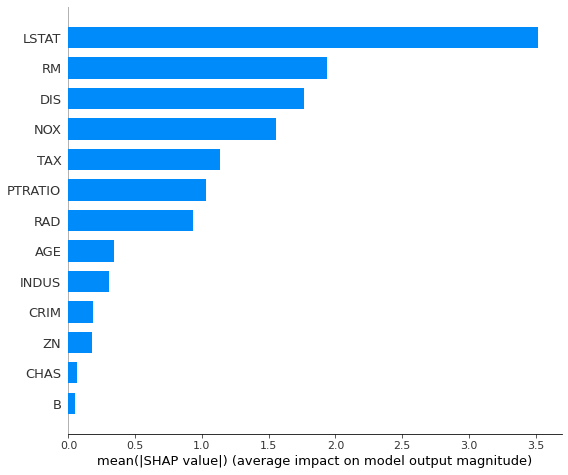

In [29]:
shap.summary_plot(shap_values_train, Xtrain, feature_names=labels, plot_type="bar")

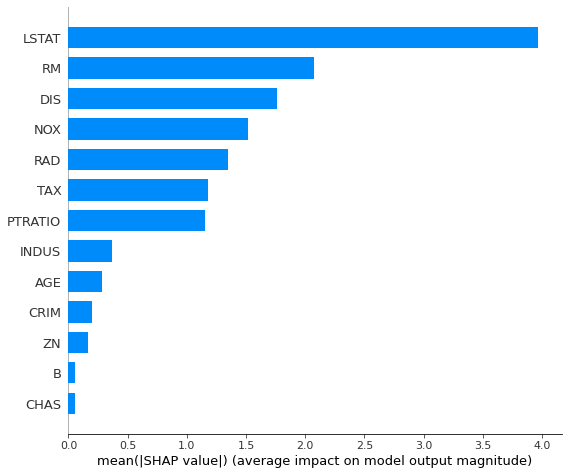

In [30]:
shap.summary_plot(shap_values_test, Xtest, feature_names=labels, plot_type="bar")

100%|===================| 299/300 [00:12<00:00]        

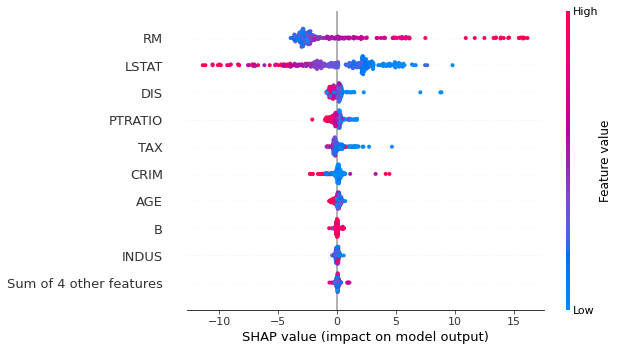

In [31]:
explainer = shap.Explainer(RF, Xtrain)
shap_values = explainer(Xtrain)
shap.plots.beeswarm(shap_values)

What do the most important features mean? <br>
How do you aggregate the most important features?

Some considerations

A) SHAP values are 1:1 to values in the dataset.

In [32]:
data_held.shape

(106, 14)

In [33]:
X = data_held[labels]
Y = data_held['MEDV']
X[labels] = scaler.fit_transform(X[labels])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
print("Linear Regresssion")
print("Held-out Error: $%.3fk" %(mean_absolute_error(LR.predict(X),Y)))

print('Decision Tree Regressor')
print("Held-out Error: $%.3fk" %(mean_absolute_error(DT.predict(X),Y)))

print("Random Forest Regressor")
print("Held-out Error: $%.3fk" %(mean_absolute_error(RF.predict(X),Y)))

print("SVM")
print("Held-out Error: $%.3fk" %(mean_absolute_error(SVM.predict(X),Y)))

print("MLP")
print("Held-out Error: $%.3fk" %(mean_absolute_error(MLP.predict(X),Y)))


Linear Regresssion
Held-out Error: $4.974k
Decision Tree Regressor
Held-out Error: $2.647k
Random Forest Regressor
Held-out Error: $2.569k
SVM
Held-out Error: $4.457k
MLP
Held-out Error: $3.345k


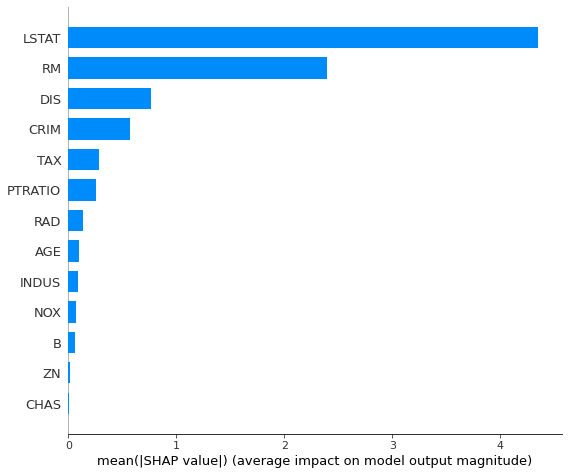

In [38]:
shap_values_held = explainer.shap_values(X)
shap.summary_plot(shap_values_held, X, feature_names=labels, plot_type="bar")

In [39]:
shap.force_plot(explainer.expected_value, shap_values_held[81,:], X.iloc[81,:13],feature_names=labels)

In [40]:
list(Y)[81]

15.0